#### First Analysis of the textual reviews
1. Taking a look at the change of reviews with more experience

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
ba_ratings = pd.read_csv("/home/uk140250/epfl/ada/data/BA_ratings.csv")
ba_reviews = pd.read_csv("/home/uk140250/epfl/ada/data/BA_reviews.csv")

rb_ratings = pd.read_csv("/home/uk140250/epfl/ada/data/RB_ratings.csv")
rb_reviews = pd.read_csv("/home/uk140250/epfl/ada/data/RB_reviews.csv")

In [13]:
ba_reviews["dataset"] = "BeerAdvocate"
rb_reviews["dataset"] = "RateBeer"
df_all = pd.concat([ba_reviews, rb_reviews]).reset_index(drop=True)
df_all["len_text"] = df_all["text"].apply(lambda x: len(str(x)))
df_all["len_words"] = df_all["text"].apply(lambda x: len(str(x).split()))

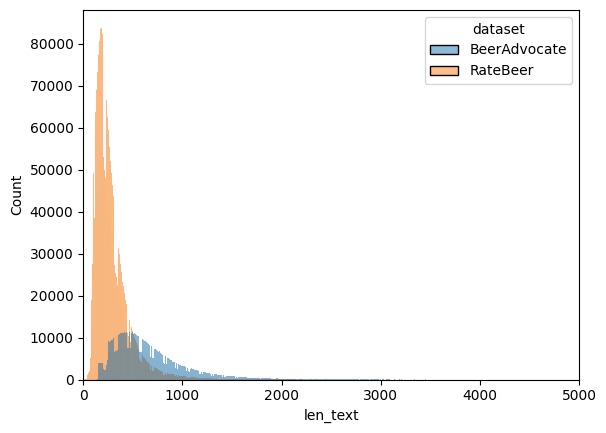

In [14]:
ax = sns.histplot(x='len_text', data=df_all, hue='dataset', alpha=0.5)
plt.xlim(0, 5000)
# plt.yscale('log')
plt.show()

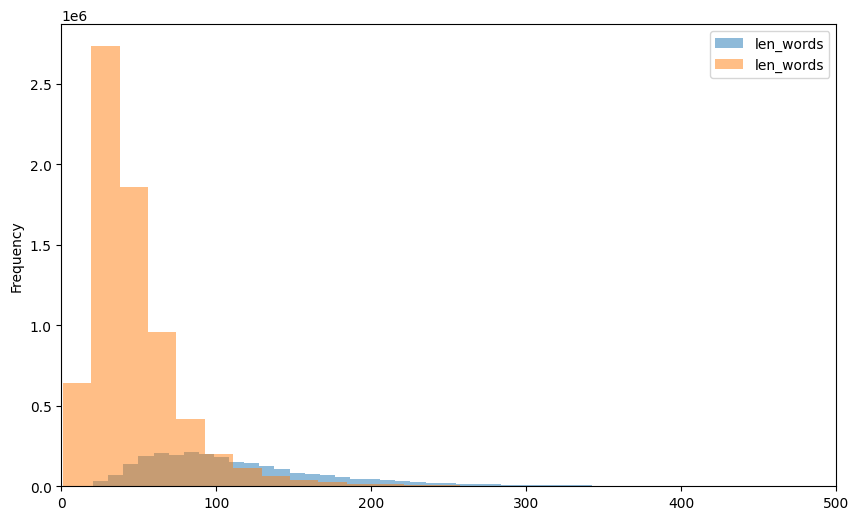

In [30]:
# ax = sns.histplot(x='len_words', data=df_all, hue='dataset', alpha=0.5)
fig, ax1 = plt.subplots(figsize=(10, 6))
df_all[df_all["dataset"] == "BeerAdvocate"][['len_words', 'dataset']].plot(kind='hist', bins=100, alpha=0.5, ax=ax1)
df_all[df_all["dataset"] == "RateBeer"][['len_words', 'dataset']].plot(kind='hist', bins=100, alpha=0.5, color="C1", ax=ax1)
plt.xlim(0, 500)
plt.xlim(0, 500)
# plt.yscale('log')
plt.show()

<Axes: xlabel='rating_order'>

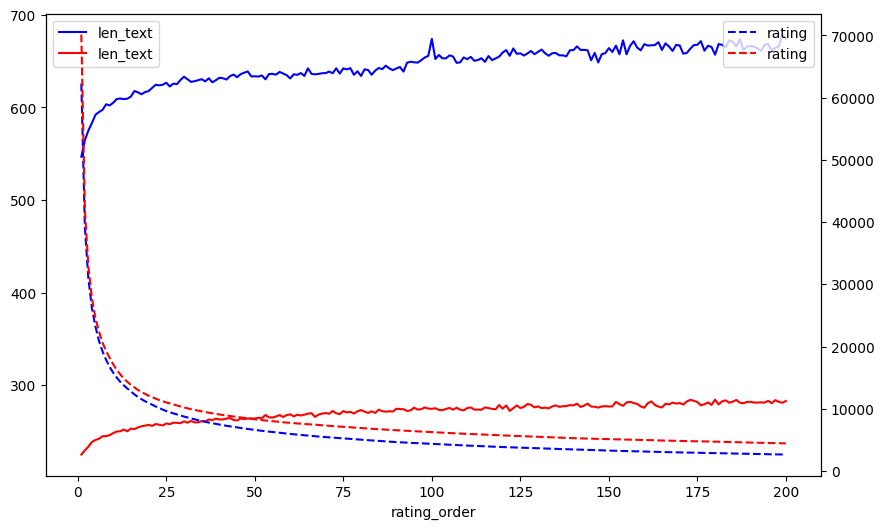

In [6]:
# Sorts the DataFrame by user and date to ensure correct order of ratings and adds column for rating number for respective user
df_all = df_all.sort_values(by=['user_id', 'date'])
df_all['rating_order'] = df_all.groupby('user_id').cumcount() + 1

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
df_first_1000 = df_all[df_all['rating_order'] <= 200]

df_first_1000[df_first_1000['dataset'] == 'BeerAdvocate'][['rating_order', 'len_text']].groupby('rating_order').mean().plot(ax=ax1, color='blue', legend="BeerAdvocate reviews length")
df_first_1000[df_first_1000['dataset'] == 'RateBeer'][['rating_order', 'len_text']].groupby('rating_order').mean().plot(ax=ax1, color='red', legend="RateBeer reviews length")

ax2 = ax1.twinx()
df_first_1000[df_first_1000['dataset'] == 'BeerAdvocate'][['rating_order', 'rating']].groupby('rating_order').count().plot(ax=ax2, color='blue', linestyle='dashed', legend="#ratings")
df_first_1000[df_first_1000['dataset'] == 'RateBeer'][['rating_order', 'rating']].groupby('rating_order').count().plot(ax=ax2, color='red', linestyle='dashed', legend="#ratings")

<Axes: xlabel='rating_order', ylabel='len_text'>

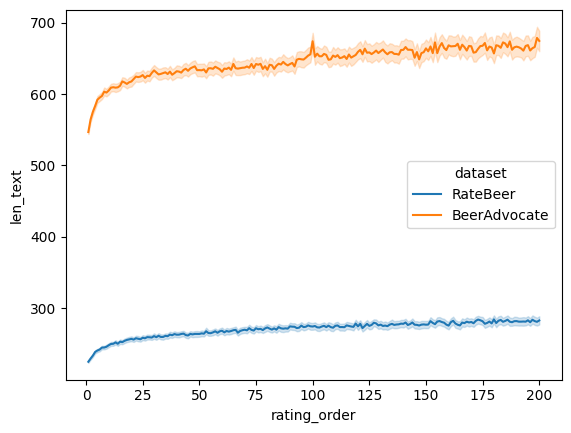

In [ ]:
# fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_first_1000, x='rating_order', y='len_text', hue='dataset')

# ax2 = ax1.

In [12]:
df_all[df_all["len_text"] > 5000]["text"].iloc[0]

'2016-08-25, vintage 2010, 6 years old, 7-4-8-4-16=39Having the 2011 still fresh in mind, actually the 2010 is holding up better; the lack of carbonation is negative, but itâ\x80\x99s not much oxidised, and it has enough malt epth and hops.Very nice.2016-08-22, Vertical TastingVintage 2011, 341ml, 11% ABV, 5 years old, 6-3-7-3-13=32The carbonation is low, not much head, but softer mouthfeel; it starts to show too many signs of age, oxidization in the nose, milder in the flavor; decent flavor, malt, a bit nutty, but shallow compared to what it was, and weak in the final. A decent drink, on a slippery slope now.Vintage 2012, 341ml, 11% ABV, 4 years old, 7-4-7-3-15=36A bit more carbonation, hence more head. Not much oxidization in the aroma, but it has a slight soapy trace, and roasted nuts; later, chestnut honey. Better mouthfeel than the 2011, but not as robust as a Barley Wine should have; malt and dark caramel flavor, mild residual sweetness, roasted nuts, and enough bitterness; basic

In [11]:
# ba_reviews["text"]
df_all.iloc[df_all["len_text"].idxmax()]["text"]

'It doesnâ\x80\x99t taste much like beer in the traditional sense.  Itâ\x80\x99s more like the best strongly cherry flavored soda water.  Itâ\x80\x99s a very tasty brew.---Rated via Beer Buddy for iPhone'

In [74]:
df_all[df_all["len_text"] > 5000]

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,dataset,len_text,rating_order
2877874,Howe Sound Woolly Bugger,135088,Howe Sound Brewing,2732,Barley Wine,10.50,1472464800,fiulijn,1786,5.00,8.00,4.00,8.0,17.0,4.20,"2016-08-25, vintage 2010, 6 years old, 7-4-8-4...",RateBeer,5867,16016
9392599,De Dolle Stille Nacht,6862,De Dolle Brouwers,1163,Belgian Strong Ale,12.00,1476439200,fiulijn,1786,5.00,10.00,4.00,10.0,19.0,4.80,"2016-10-14, bottle, vintage 1990, 26 years old...",RateBeer,5842,16478
5515184,Arrogant Double Bastard Ale,11243,Arrogant Brewing,28443,American Strong Ale,11.00,1260874800,kp,5356,3.00,6.00,3.00,7.0,15.0,3.40,"Name: Double BastardDate: November 18, 2006Mod...",RateBeer,6153,6958
7357435,Alaskan Smoked Porter,16,Alaskan Brewing Company,4,Smoked,6.50,1272103200,kp,5356,3.00,6.00,3.00,6.0,12.0,3.00,"Name: Smoked Vertical 00-07Date: November 17, ...",RateBeer,7846,7502
5476440,Anchor Our Special Ale (2001 and earlier),49,Anchor Brewing Company,11,Spice/Herb/Vegetable,5.50,1294570800,kp,5356,3.00,5.00,3.00,5.0,11.0,2.70,"Name: Our Special AleDate: January 08, 2009Mod...",RateBeer,7471,7614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83399,Harvest Ale (Limited Edition),705,J.W. Lees & Co (Brewers) Ltd,178,English Barleywine,11.50,1369216800,woodychandler,woodychandler.5708,3.50,4.50,4.75,5.0,4.5,4.67,2008 vintage.This will mark the occasion of my...,BeerAdvocate,5043,2176
833809,Double Daddy,25283,Speakeasy Ales & Lagers,559,American Double / Imperial IPA,8.50,1390388400,woodychandler,woodychandler.5708,4.00,5.00,4.50,4.0,4.5,4.39,"At long last, Speakeasy has begun to put their...",BeerAdvocate,5098,2496
1342884,Shock Top Twisted Pretzel Wheat,118675,Anheuser-Busch,29,American Dark Wheat Ale,5.20,1455274800,woodychandler,woodychandler.5708,3.25,4.00,2.75,4.5,3.5,3.93,This represents a rare opportunity for me: I a...,BeerAdvocate,5129,3420
1879422,Narragansett Lovecraft Series - Innsmouth Olde...,168038,Narragansett Brewing Co.,213,Old Ale,7.00,1458471600,woodychandler,woodychandler.5708,4.25,4.25,4.50,4.5,4.5,4.43,"I (obviously) love CANned beer, but the best p...",BeerAdvocate,5053,3490
